In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/yelp_labelled.txt"
            )
yelp = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp.columns = ['message', 'rating']

In [72]:
yelp.head()

,message,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [73]:
keywords = ['sizes', 'worth', 'poor', 'useless', 'awful', 'cheap']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [75]:
yelp['allcaps'] = yelp.message.str.isupper()

In [76]:
yelp.head()

,message,rating,sizes,worth,poor,useless,awful,cheap,allcaps
0,Wow... Loved this place.,1,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False


In [80]:
yelp.rename(columns = {'rating': 'Good'}, inplace=True)

In [81]:
yelp.head()

,message,Good,sizes,worth,poor,useless,awful,cheap,allcaps
0,Wow... Loved this place.,1,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False


In [82]:
yelp['Good'] = yelp['Good'].astype(str)

In [83]:
yelp['Good'] = yelp['Good'].str.replace("1", "Good")

In [84]:
yelp['Good'] = yelp['Good'].str.replace("0", "Bad")

In [86]:
yelp['Good'] = (yelp['Good'] == 'Good')

In [87]:
yelp.head()

,message,Good,sizes,worth,poor,useless,awful,cheap,allcaps
0,Wow... Loved this place.,True,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,False


In [88]:
yelp['allcaps'] = yelp.message.str.isupper()

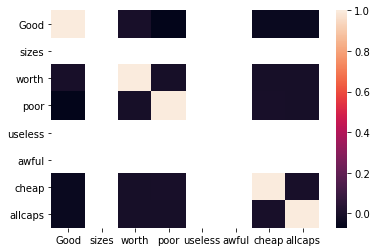

In [90]:
sns.heatmap(yelp.corr())

In [92]:
data = yelp[keywords + ['allcaps']]
target = yelp['Good']

In [96]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 490


"""

Number of mislabeled points out of a total 1000 points : 490 - GaussianNB

Number of mislabeled points out of a total 1000 points : 500 - MultinomialNB

Number of mislabeled points out of a total 1000 points : 490 - Bernoulli

"""

In [122]:
data_pathh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon = pd.read_csv(data_pathh, delimiter= '\t', header=None)
amazon.columns = ['message', 'rating']

In [123]:
keywords = ['sizes', 'worth', 'poor', 'useless', 'awful', 'cheap']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [124]:
amazon.head()

,message,rating,sizes,worth,poor,useless,awful,cheap
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False


In [125]:
amazon['allcaps'] = amazon.message.str.isupper()

In [126]:
amazon.head()

,message,rating,sizes,worth,poor,useless,awful,cheap,allcaps
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False


In [127]:
amazon.rename(columns = {'rating': 'Good'}, inplace=True)

In [128]:
amazon['Good'] = amazon['Good'].astype(str)

In [129]:
amazon['Good'] = amazon['Good'].str.replace("1", "Good")

In [130]:
amazon['Good'] = amazon['Good'].str.replace("0", "Bad")

In [131]:
amazon['Good'] = (amazon['Good'] == 'Good')

In [132]:
amazon.head()

,message,Good,sizes,worth,poor,useless,awful,cheap,allcaps
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,False,False,False,False,False,False
2,Great for the jawbone.,True,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False
4,The mic is great.,True,False,False,False,False,False,False,False


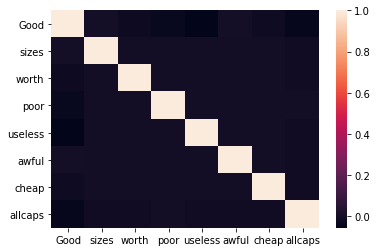

In [133]:
sns.heatmap(amazon.corr())

In [134]:
data = amazon[keywords + ['allcaps']]
target = amazon['Good']

In [137]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import GaussianNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 489


"""

Number of mislabeled points out of a total 1000 points : 489 - GaussianNB

Number of mislabeled points out of a total 1000 points : 502 - MultinomialNB

Number of mislabeled points out of a total 1000 points : 489 - Bernoulli

"""

In [138]:
# Grab and process the raw data.
data_pathhh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/imdb_labelled.txt"
            )
imdb = pd.read_csv(data_pathhh, delimiter= '\t', header=None)
imdb.columns = ['message', 'rating']

In [139]:
keywords = ['sizes', 'worth', 'poor', 'useless', 'awful', 'cheap']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb[str(key)] = imdb.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [142]:
imdb.rename(columns = {'rating': 'Good'}, inplace=True)

In [143]:
imdb['Good'] = imdb['Good'].astype(str)

In [144]:
imdb['Good'] = imdb['Good'].str.replace("1", "Good")

In [145]:
imdb['Good'] = imdb['Good'].str.replace("0", "Bad")

In [146]:
imdb['Good'] = (imdb['Good'] == 'Good')

In [147]:
imdb['allcaps'] = imdb.message.str.isupper()

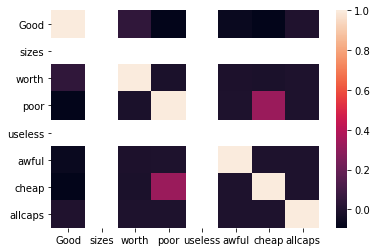

In [148]:
sns.heatmap(imdb.corr())

In [149]:
data = imdb[keywords + ['allcaps']]
target = imdb['Good']

In [152]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 349


"""

Number of mislabeled points out of a total 1000 points : 349 - GaussianNB

Number of mislabeled points out of a total 1000 points : 349 - MultinomialNB

Number of mislabeled points out of a total 1000 points : 349 - Bernoulli

"""

""" The first dataset I pick to classify is Amazon. The words I use to classify is 'sizes', 'worth', 'poor', 'useless', 'awful', 'cheap'. And it turn out for Amazon that, using Multinomial, it have the most mislabeled points. Therefore, choosing Multinomial for this dataset is a better match than Gaussian and Bernoulli. Now when I run the same classify code to other 2 dataset (Yelp and IMDB), the outcome wasn't so great. Reason why is the words that I classify in Amazon might not appear in Yelp or IMDB since all three are reviewing different products/services. For feature engineering, we can use the Categorical to graph this dataset. And for my choice of Naive Bayes, I going to choose MultinomialNB, since it always appear the highest. GaussianNB and BernoulliNB seem to even out very often (at least for these 3 dataset)."""